In [17]:
import matplotlib.pyplot as plt
from import_fun import HH, syn_sigmoidal, syn_sigmoidal_delay, create_sf, delayer, synFactor

In [18]:
dt = 0.01
method = 'euler'    # （"euler", "rk4"）
N = 1000
tau = 23

In [19]:
conn = create_sf(N)
delayN = int(tau/dt)
# delayee = delayer(N, delayN)

In [20]:
nodes = HH(N, method, dt)
nodes.params_nodes["Iex"] = 20.
# syn = syn_sigmoidal(nodes, nodes, conn, method=method)
syn = syn_sigmoidal_delay(nodes, nodes, conn, method=method, delayN=delayN)
syn.w.fill(0.1)

In [21]:
for i in range(100_00):
    nodes()

for i in range(500_00):
    Isyn = syn()
    nodes(Isyn)

mem = []
time = []
cal_Tn = 200_00
synFer = synFactor(N, cal_Tn)

nodes.record_spike_times = True
for i in range(cal_Tn):
    Isyn = syn()
    nodes(Isyn)
    synFer(nodes.vars_nodes[0])
    mem.append(nodes.vars_nodes[0].copy())
    time.append(nodes.t)

In [22]:
kop = nodes.cal_kop()[0]
kop

0.995578651725476

In [23]:
synFer.return_syn()

0.9504660746411706

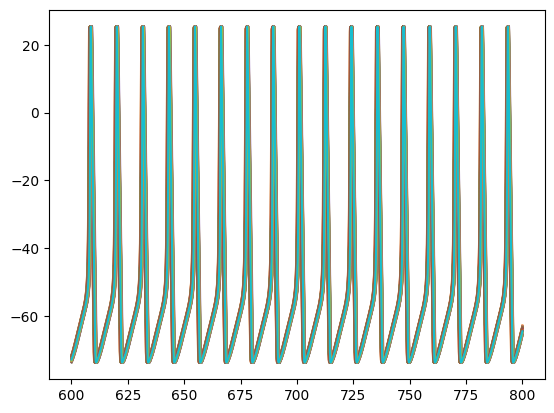

In [24]:
plt.plot(time, mem)
plt.show()